In [91]:
import pandas as pd
from pathlib import Path
import matplotlib
import hvplot.pandas
import plotly.express as px

%matplotlib inline

In [84]:
# Data source & Art Prices:
# Copyright © Artprice.com
# Indexes are calculated based on all Fine Art auction results (paintings, sculptures, drawings, photographs, prints, watercolors, etc.) recorded by Artprice.com, apart from antiques and furniture. 
# Auction results are converted in USD, if no other specification.

file_path = Path("../data_imports/Artprice_Indexes_Quarterly_data_Base100_January1998.csv")

In [85]:
art_index = pd.read_csv(file_path, encoding='utf-8')

art_index.head(10)

,Unnamed: 0,Global Index (USD),Global Index (EUR),Painting,Sculpture,Photography,Drawing,Print,19th Century,Modern Art,Post-War,Contemporary,USA (USD),UK (GBP),France (EUR)
0,1/1/1998,100,100,100,100,100,100,100,100,100,100,100,105,100,100
1,4/1/1998,107,110,109,139,96,104,114,110,98,114,101,104,98,107
2,7/1/1998,106,106,107,133,94,106,127,118,97,112,109,100,95,105
3,10/1/1998,96,96,103,128,85,109,123,122,94,102,114,102,97,100
4,1/1/1999,104,100,107,132,84,108,109,119,87,108,112,104,100,100
5,4/1/1999,103,104,114,134,85,103,109,113,81,122,106,104,101,105
6,7/1/1999,104,112,115,134,85,102,123,112,81,130,101,107,104,110
7,10/1/1999,104,113,115,140,92,103,130,111,87,135,109,112,109,115
8,1/1/2000,113,123,117,140,126,109,123,109,99,140,132,115,113,123
9,4/1/2000,116,133,118,137,156,114,123,106,109,141,145,114,117,131


In [86]:
art_index.rename(columns=({"Unnamed: 0" : "Date"}), inplace=True)
art_index.dropna()

art_index.head()

,Date,Global Index (USD),Global Index (EUR),Painting,Sculpture,Photography,Drawing,Print,19th Century,Modern Art,Post-War,Contemporary,USA (USD),UK (GBP),France (EUR)
0,1/1/1998,100,100,100,100,100,100,100,100,100,100,100,105,100,100
1,4/1/1998,107,110,109,139,96,104,114,110,98,114,101,104,98,107
2,7/1/1998,106,106,107,133,94,106,127,118,97,112,109,100,95,105
3,10/1/1998,96,96,103,128,85,109,123,122,94,102,114,102,97,100
4,1/1/1999,104,100,107,132,84,108,109,119,87,108,112,104,100,100


In [87]:
art_index.set_index("Date", drop=True, inplace=True)
art_index.head()


,Global Index (USD),Global Index (EUR),Painting,Sculpture,Photography,Drawing,Print,19th Century,Modern Art,Post-War,Contemporary,USA (USD),UK (GBP),France (EUR)
Date,,,,,,,,,,,,,,
1/1/1998,100,100,100,100,100,100,100,100,100,100,100,105,100,100
4/1/1998,107,110,109,139,96,104,114,110,98,114,101,104,98,107
7/1/1998,106,106,107,133,94,106,127,118,97,112,109,100,95,105
10/1/1998,96,96,103,128,85,109,123,122,94,102,114,102,97,100
1/1/1999,104,100,107,132,84,108,109,119,87,108,112,104,100,100


In [88]:
art_index_plot = art_index.hvplot(title="Art Price Index - Quarterly Price in Base 100", ylabel="Price - Base 100", frame_width=1500, frame_height=500, rot=90)

art_index_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [99]:
art_index_quarterly_returns = art_index.pct_change().dropna()
art_index_quarterly_returns.head()

,Global Index (USD),Global Index (EUR),Painting,Sculpture,Photography,Drawing,Print,19th Century,Modern Art,Post-War,Contemporary,USA (USD),UK (GBP),France (EUR)
Date,,,,,,,,,,,,,,
4/1/1998,0.070000,0.100000,0.090000,0.390000,-0.040000,0.040000,0.140000,0.100000,-0.020000,0.140000,0.010000,-0.009524,-0.020000,0.070000
7/1/1998,-0.009346,-0.036364,-0.018349,-0.043165,-0.020833,0.019231,0.114035,0.072727,-0.010204,-0.017544,0.079208,-0.038462,-0.030612,-0.018692
10/1/1998,-0.094340,-0.094340,-0.037383,-0.037594,-0.095745,0.028302,-0.031496,0.033898,-0.030928,-0.089286,0.045872,0.020000,0.021053,-0.047619
1/1/1999,0.083333,0.041667,0.038835,0.031250,-0.011765,-0.009174,-0.113821,-0.024590,-0.074468,0.058824,-0.017544,0.019608,0.030928,0.000000
4/1/1999,-0.009615,0.040000,0.065421,0.015152,0.011905,-0.046296,0.000000,-0.050420,-0.068966,0.129630,-0.053571,0.000000,0.010000,0.050000


In [101]:
art_index_quarterly_returns_plot = art_index_quarterly_returns.hvplot(title="Art Price Index - Quarterly Returns", ylabel="Price - Base 100", frame_width=1500, frame_height=500, rot=90)

art_index_quarterly_returns_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [111]:
art_index_cum_returns = art_index_quarterly_returns.sum().sort_values()
art_index_cum_returns.head()

19th Century   -0.252225
Painting        0.260582
USA (USD)       0.264261
France (EUR)    0.326898
Modern Art      0.426065
dtype: float64

In [120]:
(art_index_cum_returns*10).hvplot(kind="bar", frame_width=1500, frame_height=500, rot=45).opts(yformatter="%.0f%%")

:Bars   [index]   (0)

In [121]:
art_index_std = art_index_quarterly_returns.std().sort_values()
art_index_std

Painting              0.042109
France (EUR)          0.046412
UK (GBP)              0.047550
USA (USD)             0.053729
Post-War              0.059306
Sculpture             0.061725
Print                 0.065150
19th Century          0.065815
Modern Art            0.076383
Contemporary          0.076740
Drawing               0.085314
Photography           0.086507
Global Index (EUR)    0.141442
Global Index (USD)    0.146929
dtype: float64

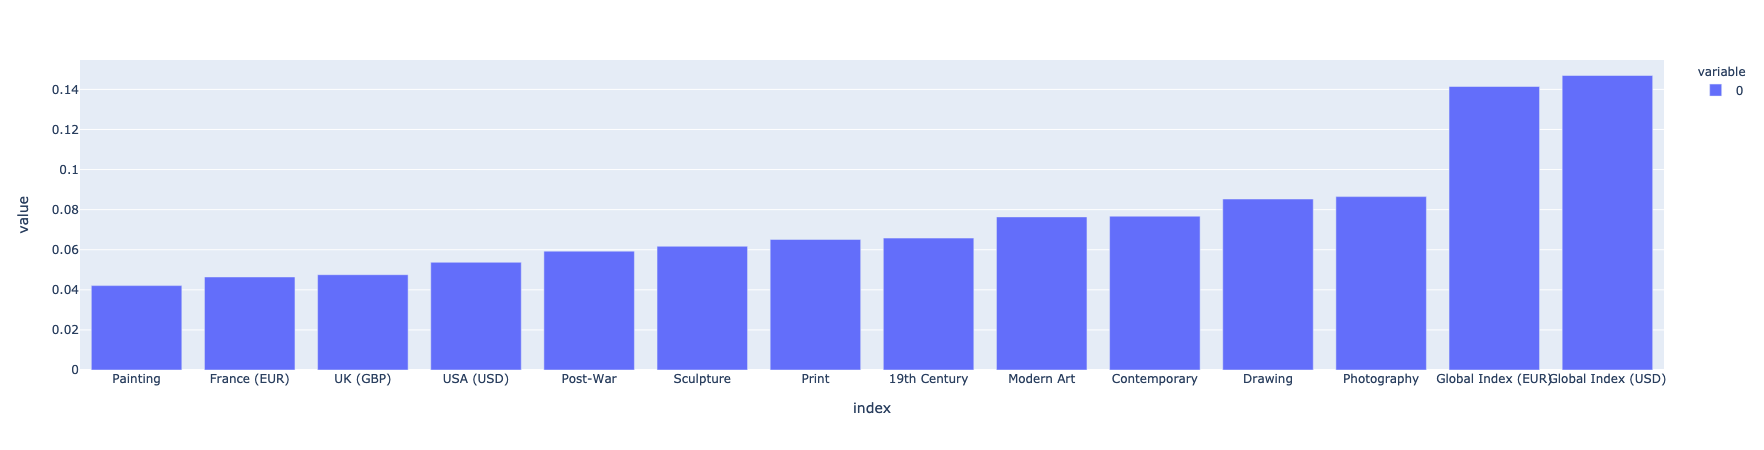

In [122]:
art_index_std_box = px.bar(art_index_std)
art_index_std_box